In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Supporting Functions

Training data ${(X_1,y_1), .....(X_n,y_n)}$
X is augmented feature vector, which has 1 in first position
$$A=[x_1,....x_n] \\ x \in R^d \\ Y=[y_1,y_2,...y_n]$$
Where d is number of featuers and n is number of samples

Weight vector such that for any given $X$, y is predicted as $$ \hat{y} = W^T X $$

$W$ obtained from Linear Least Squares Solution as follows:
$$ W = (A^TA)^{-1}A^TY$$


In [2]:
def compute_weights(df):
    """ Method to compute weights from given dataframe. 
    Weights are computed using Linear least squares method, 
    with number of data samples equal to size."""
    d = df.shape[1]
    y = df.to_numpy()[:,d-1]
    a = df.to_numpy()[:,0:d-1]
    temp = np.matmul(a.transpose(), a)
    w = np.linalg.inv(temp).dot(a.transpose()).dot(y)
    return w

In [3]:
def loss(weights, df):
    """Computes accracy of data with respesct to classifier
        defined by weights"""
    n = df.shape[0]
    d = df.shape[1]
    l = 0.0
    a = df.to_numpy()
    for i in range(n):
        t = a[i,0:d-1]
        yhat = t.dot(weights)
        l += (yhat-a[i,d-1])**2
    return l/n


In [67]:
def plot(weights,df,label,ind):
    n = df.shape[0]
    d = df.shape[1]    
    a = df.to_numpy()
    x = a[:,1]
    yhat = np.zeros(n)
    for i in range(n):
        t = np.array(a[i,0:d-1])
        yhat[i] = t.dot(weights)
    # plt.subplot(8,2,ind)
    plt.plot(x,yhat,label = label)
    plt.legend()
    plt.savefig('/content/'+label+'.png')

# Load Training Data

Training Data samples are obtained as follows: \\
For a given $X \in R, y = 0.25X^3+1.25X^2-3X-3$

In [68]:
train = pd.read_csv("1D_regression_data.csv", header = None, 
                    sep = "    ", engine = 'python')
n = train.shape[0]
print(f"Total samples: {n}")

Total samples: 100


Test, Train split of sizes 0.25n and 0.75n

In [69]:
samples = np.random.rand(n) < 0.75
print("Training size: ", samples.sum())
print("Test size: ", n-samples.sum())
test = train[~samples]
train = train[samples]
train_numpy = train.to_numpy()
test_numpy = test.to_numpy()


Training size:  70
Test size:  30


In [70]:
# Extract x and y to plot data points
train_x = train_numpy[:,0]
train_y = train_numpy[:,1]

test_x = test_numpy[:,0]
test_y = test_numpy[:,1]

# Insert bias term
train.insert(0,'bias',np.ones(train_x.size),True)
test.insert(0,'bias',np.ones(test_x.size),True)

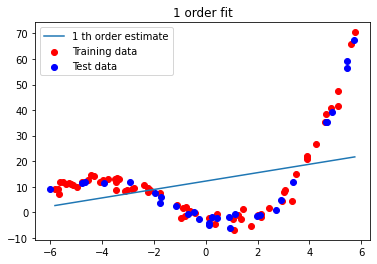

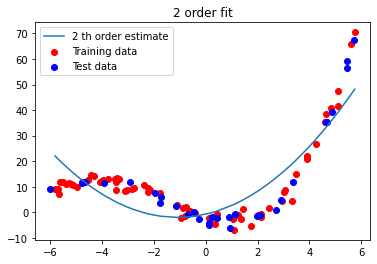

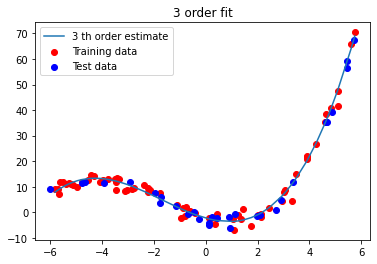

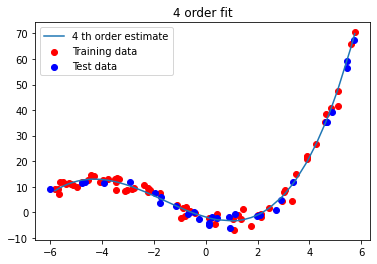

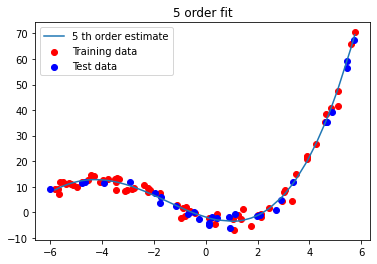

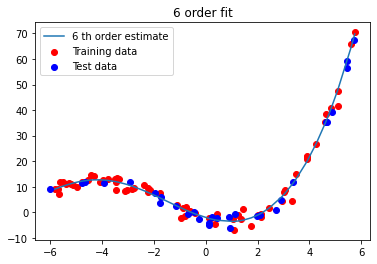

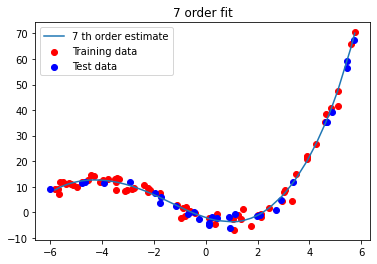

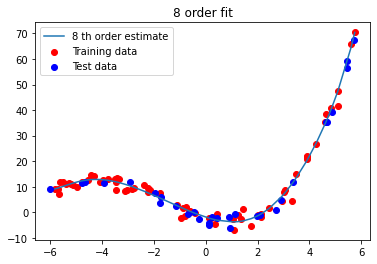

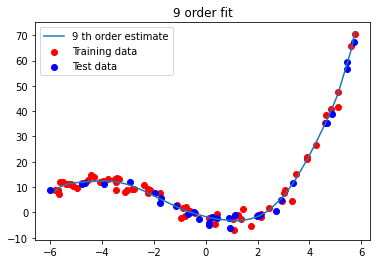

In [71]:
TEST_LOSS = []
TNG_LOSS = []
WEIGHTS = []
prev_loss = 10000000000
ind = 1
for i in range(1,10):
    # Create new plot for every 3 sets of weights
    plt.figure()
    plt.scatter(train_x,train_y,color='red',marker='o', label = 'Training data')
    plt.title(str(i)+ " order fit")
    plt.scatter(test_x,test_y,color='blue',marker='o', label = 'Test data')
    plt.legend()
    
    # Insert new column corresponding to new features in higher dimension
    if(i>1):
        train.insert(i,str(i),train_x**i,True)
        test.insert(i,str(i),test_x**i,True)
        # print("Index: ", i)
        # print(train)
        
    # Compute weights
    weights = compute_weights(train)
    WEIGHTS.append(weights)
    
    # Compute loss
    lss = loss(weights, test)
    tng_loss = loss(weights, train)
    TEST_LOSS.append(lss)
    TNG_LOSS .append(tng_loss)
    
    # Plot data
    plot(weights,train, label = str(i) + " th order estimate", ind=ind)
    ind += 1

Weights:  [array([12.20563035,  1.64592348]), array([-0.74964461,  2.32801119,  1.07368608]), array([-2.26060381, -2.83330843,  1.2359773 ,  0.24474825]), array([-1.90696653, -2.87372851,  1.13696264,  0.2470054 ,  0.00330593]), array([-1.92501773e+00, -3.04493850e+00,  1.14356820e+00,  2.69420715e-01,
        3.04139025e-03, -5.74137425e-04]), array([-2.06006922e+00, -3.03342193e+00,  1.22802021e+00,  2.67910332e-01,
       -4.32177043e-03, -5.31450451e-04,  1.56134764e-04]), array([-2.09715246e+00, -3.24994911e+00,  1.25116798e+00,  3.22272963e-01,
       -6.23607061e-03, -3.94928903e-03,  1.95455169e-04,  6.08319324e-05]), array([-1.90123350e+00, -3.25884852e+00,  1.03604629e+00,  3.28463160e-01,
        2.76857481e-02, -4.46049814e-03, -1.49252524e-03,  7.10959840e-05,
        2.60186915e-05]), array([-1.70800005e+00, -2.49178465e+00,  8.65664916e-01, -1.37566388e-03,
        5.36987081e-02,  3.33145468e-02, -2.80043239e-03, -1.50932888e-03,
        4.64780798e-05,  2.18046068e-05]

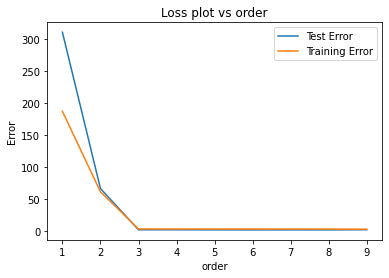

In [72]:
TEST_LOSS = np.array(TEST_LOSS)
TNG_LOSS = np.array(TNG_LOSS)
test_x = np.arange(1,TEST_LOSS.size+1,1)
tng_x = np.arange(1,TNG_LOSS.size+1,1)
plt.figure()
plt.title("Loss plot vs order")
plt.plot(test_x,TEST_LOSS, label = "Test Error")
plt.plot(tng_x,TNG_LOSS, label = "Training Error")
plt.xlabel('order')
plt.ylabel('Error')
plt.legend()
plt.savefig('/content/loss.png')
    
    
print("Weights: ", WEIGHTS)
print("Training error: ", TNG_LOSS)
print("Test error: ", TEST_LOSS)

# Observations:

We can observe that as we increase the order of polynomial, loss is steadily decreasing till order = 3 (Since our desired polynomial is of order 3:  $y = 0.25X^3+1.25X^2-3X-3$. \\
Parameters learnt at order 3: $[-2.53585429, -2.64589145,  1.24156451,  0.23687811]$ is close to true solution of $[-3,-3,1.25,0.25]$. 

From the plots above, we can observe that our model is **under fitting for order < 3 and overfitting for order > 3**.

Below is an example of 24th order fit. Even though it has low training error, test error is very high. It is quite intuitive to observe the poor predictions for 24th order estimate.

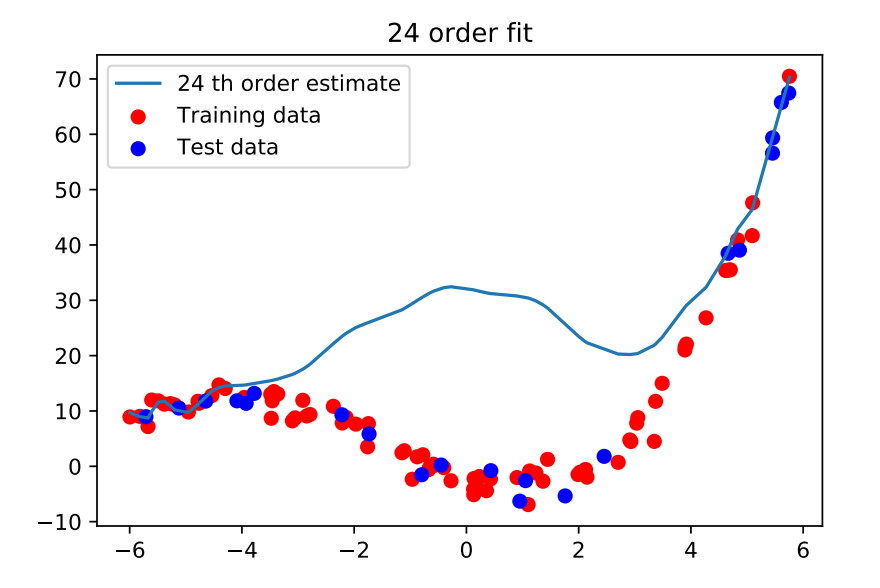

In [58]:
Howver